In [101]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/woc files/polynomial_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
x_train=np.array(df.iloc[:,1:-1])
y_train=np.array(df.iloc[:,-1])
x_train.shape


(50000, 3)

In [103]:
d=5
x_train_p=x_train
for k in range(2,d+1):
  for i in range(0,k+1):
    for j in range(0,k-i+1):
      hjhjhjhj=((x_train[:,0])**(i))*((x_train[:,1])**(j))*((x_train[:,2])**(k-i-j))
      x_train_p=np.insert(x_train_p,0,hjhjhjhj,axis=1)


In [105]:
print(x_train)
print(x_train_p)
print(x_train_p.shape)
print(y_train)

[[-1113.92458108   952.10540425  -276.04588086]
 [-2229.48022767  1111.48856784   -93.4541072 ]
 [ 2717.25771283    53.43123706  -179.22859092]
 ...
 [ -533.44699332  1171.45733504  -130.84092473]
 [ 1810.49910349  -424.11169601  -128.33498562]
 [ -861.91021653   257.2959923   -176.1228714 ]]
[[-1.71505850e+15  1.46591295e+15 -4.25015160e+14 ... -1.11392458e+03
   9.52105404e+02 -2.76045881e+02]
 [-5.50830685e+16  2.74611993e+16 -2.30894131e+15 ... -2.22948023e+03
   1.11148857e+03 -9.34541072e+01]
 [ 1.48133796e+17  2.91285288e+15 -9.77081096e+15 ...  2.71725771e+03
   5.34312371e+01 -1.79228591e+02]
 ...
 [-4.31972757e+13  9.48618440e+13 -1.05951886e+13 ... -5.33446993e+02
   1.17145734e+03 -1.30840925e+02]
 [ 1.94532232e+16 -4.55694205e+15 -1.37891762e+15 ...  1.81049910e+03
  -4.24111696e+02 -1.28334986e+02]
 [-4.75674799e+14  1.41997643e+14 -9.71994644e+13 ... -8.61910217e+02
   2.57295992e+02 -1.76122871e+02]]
(50000, 55)
[ -1294.28891782 -27146.87008356  64743.00171817 ...   -28

In [106]:
mu=np.mean(x_train_p,axis=0)
sigma=np.std(x_train_p,axis=0)
x_train_norm_p=((x_train_p-mu)/sigma)


In [107]:
x_train_train= x_train_norm_p[:-10000,:]
x_cv= x_train_norm_p[-10000:,:]
y_train_train= y_train[:-10000]
y_cv= y_train[-10000:]

In [108]:
print(x_cv.shape)
print(x_train_train.shape)
print(y_cv.shape)
print(y_train_train.shape)


(10000, 55)
(40000, 55)
(10000,)
(40000,)


In [109]:
Xt = x_train_train
yt = y_train_train
m,n=Xt.shape
Xt.shape

(40000, 55)

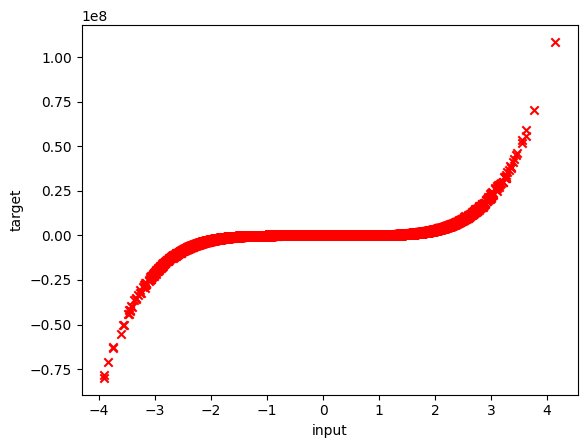

In [110]:
plt.scatter(Xt[:,-3],yt,marker='x',c='r')
plt.ylabel("target")
plt.xlabel("input")
plt.show()


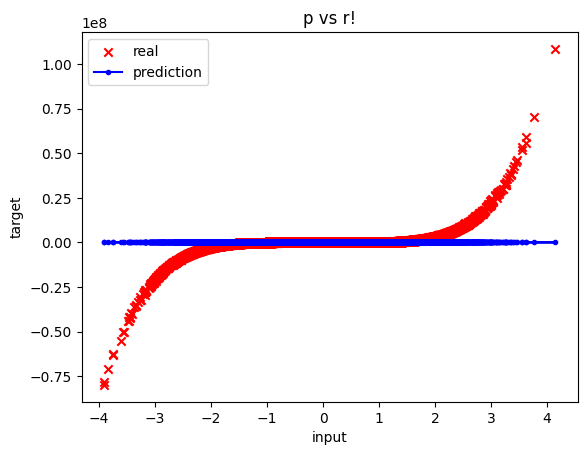

3153636717415.819
(array([-2.44278493e+06, -1.18908758e+05, -7.81880440e+04, -1.29042759e+06,
        7.19972932e+05, -1.73352178e+06, -2.19121162e+04, -1.41167849e+04,
        2.37453054e+04, -7.76882740e+04, -3.61920014e+05,  2.81131579e+05,
       -5.74078934e+05,  2.75359652e+05, -6.76106672e+05,  4.58666053e+03,
       -2.37607836e+03,  6.20435934e+03, -5.61504699e+03,  8.18842440e+03,
       -1.56064255e+04, -3.45201193e+04, -8.46817138e+05,  2.00918784e+06,
       -2.73034724e+04, -1.01304923e+04,  5.48906824e+04, -3.28292510e+05,
        6.70890844e+05, -3.38107231e+05,  8.29983911e+05,  3.62732157e+03,
       -6.80724160e+03,  8.14175607e+03, -8.19830987e+03,  1.79479284e+04,
       -2.22411048e+06, -6.19749362e+04, -2.08523921e+04, -7.49779392e+05,
        4.02960795e+05, -1.00289893e+06,  6.96053073e+02, -1.03438854e+04,
        7.33470318e+03, -1.96522464e+04, -4.70315675e+04, -4.68812624e+05,
        1.16419059e+06,  2.53789172e+03, -4.81451995e+03,  2.02687003e+04,
      

In [111]:
def function(X,w,b):#f is function/model
  f1= np.dot(X,w)+b
  return f1
rw=np.ones(n)
rb=1

plt.scatter(Xt[:,-3],yt,marker='x',c='r',label="real")
plt.plot(Xt[:,-3],function(Xt,rw,rb),marker='.',c='b',label="prediction")
plt.title("p vs r!")
plt.ylabel("target")
plt.xlabel("input")
plt.legend()
plt.show()

def error(X,y,w,b):
  e1=function(X,w,b)-y
  return e1

def cost(X,y,w,b,lam): #c is cost
  m,n=X.shape
  e=error(X,y,w,b)
  c1=np.dot(e,e)+(lam*(np.dot(w,w)))
  c2=c1/(2*m)
  return c2

print(cost(Xt,yt,rw,rb,1))


def derivatives(X,y,w,b,lam): #d is derivative for desent
  e = error(X,y,w,b)
  m,n=X.shape
  db=((np.sum(e))/m)
  dw=(np.dot(X.T,e)+(lam*(w)))/m

  return dw,db
print(derivatives(Xt,yt,rw,rb,1))

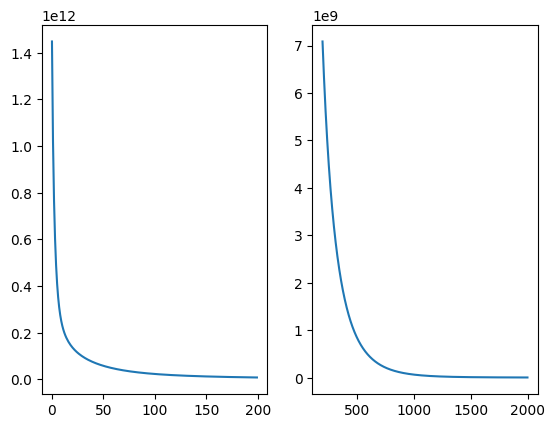

i=1999,w=[ 2.56085466e+06  7.02303500e+04  5.65703294e+04  2.54732025e+04
  2.16444136e+03  5.73161299e+03  9.39659512e+02  4.06957694e+02
  3.64555261e+03  5.82962833e+03  2.04937969e+03 -1.75503458e+02
  6.03093776e+02  7.94612873e+02 -3.49702062e+03 -1.53599926e+02
 -3.82925434e+02 -1.46670254e+03 -1.10342291e+03 -6.06837560e+02
  2.27629219e+02  4.38031317e+03 -2.14549087e+03  1.08882020e+04
 -4.56600612e+02  5.78445576e+03  6.91924979e+03 -1.09077590e+02
  1.55651222e+03  8.84161107e+02  1.42157522e+02 -1.65600081e+02
 -1.72659257e+03 -8.21324183e+02  3.22592680e+02  9.31951760e+02
  9.96421055e+03  3.36588765e+03 -3.29091508e+03  2.01918754e+03
  1.68885190e+03  5.11840853e+03 -1.25381351e+02  1.23135229e+03
  4.45414051e+02 -8.27298673e+02 -5.13618298e+03  1.28009083e+03
 -2.06370015e+03  8.98835429e+02 -1.71799196e+03 -1.54466642e+03
 -6.02213792e+03 -1.68535558e+03  4.71561765e+02],b=4758.993696047993,cost=2528050.9880997594
cost_cv=2880760.401693668
cost_test=2880760.40169366

In [112]:
def gradiant(X,y,w,b,al,i,lam): #g is gradiant
  c_log=np.zeros(i)
  for i in range(i):
    dw,db = derivatives(X,y,w,b,lam)
    w=(w-al*dw)
    b=(b-al*db)
    c_log[i]=cost(X,y,w,b,lam)
  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(c_log[:200])
  ax2.plot(200+np.arange(len(c_log[200:])),c_log[200:])
  plt.show()
  print(f"i={i},w={w},b={b},cost={cost(X,y,w,b,lam)}")
  return w,b
w,b= gradiant(Xt,yt,rw,rb,0.1,2000,0)
print(f"cost_cv={cost(x_cv,y_cv,w,b,0)}")
print(f"cost_test={cost(x_cv,y_cv,w,b,0)}")




0.9999991983328983
0.9999992929041757


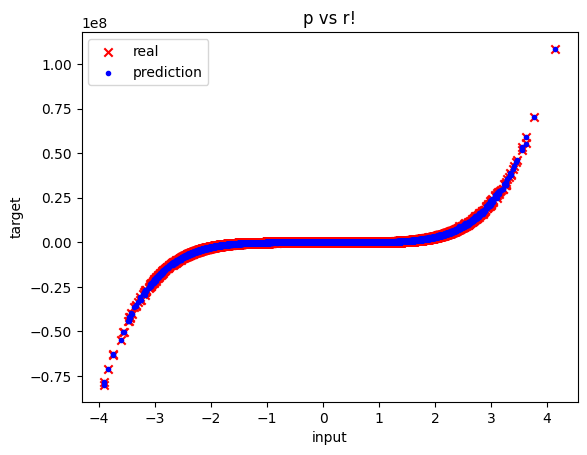

In [113]:

TSS=np.sum((yt-np.mean(yt))**2)
RSS=np.sum((error(Xt,yt,w,b))**2)
R_2=(1-(RSS/TSS))
print(R_2)

TSS=np.sum((y_cv-np.mean(y_cv))**2)
RSS=np.sum((error(x_cv,y_cv,w,b))**2)
R_2=(1-(RSS/TSS))
print(R_2)

plt.scatter(Xt[:,-3],yt,marker='x',c='r',label="real")
plt.scatter(Xt[:,-3],function(Xt,w,b),marker='.',c='b',label="prediction")
plt.title("p vs r!")
plt.ylabel("target")
plt.xlabel("input")
plt.legend()
plt.show()

In [114]:
dft=pd.read_csv('/content/polynomial_test_data.csv')

x_test1=np.array(dft.iloc[:,1:])
print(x_test1)
d=5
x_test_p=x_test1
for k in range(2,d+1):
  for i in range(0,k+1):
    for j in range(0,k-i+1):
      hjhjhjhj=((x_test1[:,0])**(i))*((x_test1[:,1])**(j))*((x_test1[:,2])**(k-i-j))
      x_test_p=np.insert(x_test_p,0,hjhjhjhj,axis=1)

x_test_norm=((x_test_p-mu)/sigma)

y_p=function(x_test_norm,w,b)


print(y_p)

dft['pridiction']=y_p

print(dft.head(5))

l=dft.columns
dftf=dft.drop(columns=l[1:-1])
print(dftf)

dftf.to_csv('final poly predictions with ids 2.csv')


FileNotFoundError: ignored